In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../')
import rhkpy

import matplotlib.pyplot as pl
import numpy as np
import xarray as xr
from scipy import ndimage
import hvplot.xarray
import holoviews as hv

In [3]:
rhkpy.__version__

'1.3.7'

# Error descriptions

**KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461**

Original file from Konrad, doesn't load: Value error
It's rotated by 90 deg wrt "_199"

**KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199**

Same measurement at 0 degrees.

**KK_MK_FLG_ABC_73_9K_2024_06_10_15_02_52_501**

Ez is 90 fokkal el van forgatva. Be tudja olvasni az RHKPY, de nem ábrázolja a QPlot-al.

**KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337**

92.5 fokkal elforgatott dI/dV terkep

In [4]:
filepath = r'C:\Users\zrbyt\OneDrive - energia.mta.hu\Documents\work_MFA\RHK Test Python Code\didu maps - 90 deg rot' + '\\'

Testing on an image where the orientation is known

In [37]:
map209 = rhkpy.rhkdata(filepath + '9K_ABC6_2020_11_02_08_47_19_209.sm4')

In [38]:
map209.qplot()

BokehModel(combine_events=True, render_bundle={'docs_json': {'9d3cdefc-2a22-4548-9c74-8dd45d275110': {'version…

In [44]:
plot_topo = map209.image.topography[:, :, 0].hvplot.image(x = 'x', cmap = 'plasma')
plot_spec = map209.spectra.lia[90, :, :, 0, 0].hvplot.image(x = 'specpos_x', cmap = 'viridis')
plot_curr = map209.spectra.current[90, :, :, 0, 0].hvplot.image(x = 'specpos_x', cmap = 'viridis')
plot_topo + plot_spec + plot_curr

:Layout
   .Image.I   :Image   [x,y]   (topography)
   .Image.II  :Image   [specpos_x,specpos_y]   (lia)
   .Image.III :Image   [specpos_x,specpos_y]   (current)

In [40]:
# cut the first few pixels in each space direction
plot_topo = map209.image.topography[0:100, 0:100, 0].hvplot.image(x = 'x', cmap = 'plasma')
plot_spec = map209.spectra.lia[90, 0:30, 0:30, 0, 0].hvplot.image(x = 'specpos_x', cmap = 'viridis')
plot_topo + plot_spec

:Layout
   .Image.I  :Image   [x,y]   (topography)
   .Image.II :Image   [specpos_x,specpos_y]   (lia)

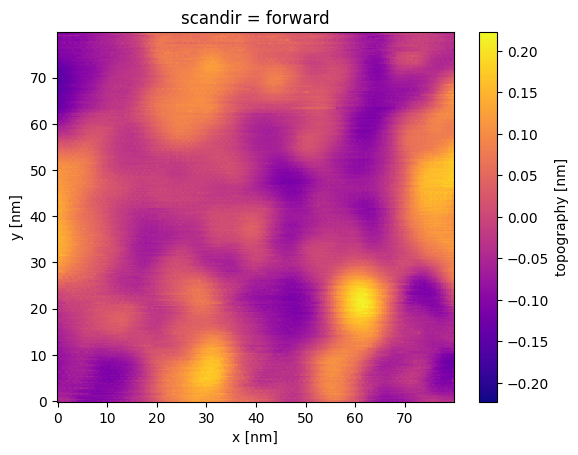

In [41]:
map209.image.topography[:, :, 0].plot(cmap='plasma')

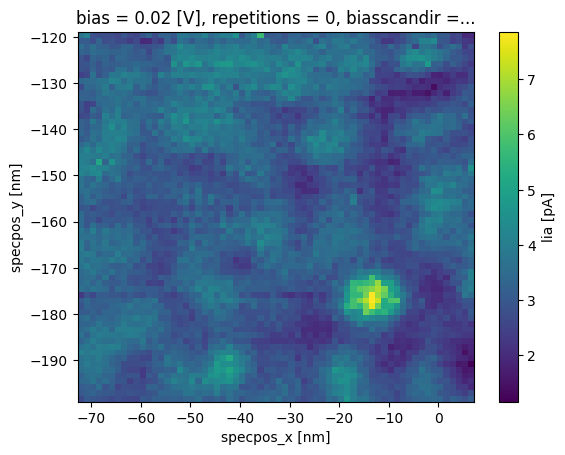

In [42]:
map209.spectra.lia[90, :, :, 0, 0].plot(cmap = 'viridis')

In [45]:
map199 = rhkpy.rhkdata(filepath + 'KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199.sm4')

In [46]:
map199.qplot()

BokehModel(combine_events=True, render_bundle={'docs_json': {'73cd1acb-94bf-4ee0-aa9a-4b23c6f234e4': {'version…

In [47]:
map501 = rhkpy.rhkdata(filepath + 'KK_MK_FLG_ABC_73_9K_2024_06_10_15_02_52_501.sm4')

In [48]:
map501.qplot()

BokehModel(combine_events=True, render_bundle={'docs_json': {'a4552248-9bd2-41b1-8ba5-50f190ba87c8': {'version…

In [49]:
map461 = rhkpy.rhkdata(filepath + 'KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461.sm4')

In [50]:
map461.qplot()

BokehModel(combine_events=True, render_bundle={'docs_json': {'1f7fe286-dcb8-48f5-93c6-3b24f8ce4341': {'version…

In [51]:
map337 = rhkpy.rhkdata(filepath + 'KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337.sm4')

In [52]:
map337.qplot()

BokehModel(combine_events=True, render_bundle={'docs_json': {'46de254e-35b0-4651-8d72-6496d3c8a41f': {'version…

In [53]:
rhkpy.navigation(map461, map199, map337)

:Overlay
   .Image.KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461_full_stop_sm4                  :Image   [x,y]   (topography)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461_full_stop_sm4.I                :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461_full_stop_sm4.II               :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461_full_stop_sm4.III              :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461_full_stop_sm4.IV               :Curve   [x]   (y)
   .Image.KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199_full_stop_sm4                  :Image   [x,y]   (topography)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199_full_stop_sm4.I                :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199_full_stop_sm4.II               :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199_full_stop_sm4.III              :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199_full_stop_sm4.IV               :Curve   [x]   (y)
   .Image.KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337_full_stop_sm4                  :Image   [x,y]   (topography)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337_full_stop_sm4.I                :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337_full_stop_sm4.II               :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337_full_stop_sm4.III              :Curve   [x]   (y)
   .Curve.KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337_full_stop_sm4.IV               :Curve   [x]   (y)
   .Scatter.Spec_pos_colon_KK_MK_FLG_ABC_73_9K_2024_06_06_16_47_58_461_full_stop_sm4 :Scatter   [x]   (y)
   .Scatter.Spec_pos_colon_KK_MK_FLG_ABC_73_9K_2024_06_05_17_16_48_199_full_stop_sm4 :Scatter   [x]   (y)
   .Scatter.Spec_pos_colon_KK_MK_FLG_ABC_73_9K_2024_06_07_15_00_05_337_full_stop_sm4 :Scatter   [x]   (y)